## Import Libraries

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import pickle
import matplotlib.pyplot as plt
import nltk

## Read Dataset

In [169]:
#1) Read the data
data = pd.read_pickle('data/email_campaigns.pkl')
print(len(data))

52


In [170]:
subject, body, opened, clicked_meeting_link, responded = [], [], [], [], []

for i in range(len(data)):    
    for key, val in data[i].items():
        for j in range(len(val)):
            if type(val[j])==type({}):
                subject.append(val[j]["subject"])
                body.append(val[j]["body"])
                opened.append(val[j]["opened"])
                responded.append(val[j]["responded"])
                try:
                    clicked_meeting_link.append(val[j]["meeting link clicked"])
                except:
                    clicked_meeting_link.append(val[j]["meeting_link_clicked"])
            else:
                #print(data[i].keys())
                continue

In [171]:
print(len(subject),len(body),len(opened),len(responded),len(clicked_meeting_link))

154 154 154 154 154


In [172]:
df = pd.DataFrame({"subject":subject,"body":body,"opened":opened,"clicked_meeting_link":clicked_meeting_link,"responded":responded})

In [173]:
df.head()

,subject,body,opened,clicked_meeting_link,responded
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False


In [194]:
df.shape

(154, 5)

## Preprocessing

In [174]:
columns = list(df.columns)
#1) remove special characters, lower case
for col in columns:
    df[col] = df[col].astype(str).str.replace('\W',' ')
    df[col] = df[col].astype(str).str.lower()

/tmp/ipykernel_17459/3761462469.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].astype(str).str.replace('\W',' ')


In [175]:
df.head()

,subject,body,opened,clicked_meeting_link,responded
0,propel your marketing roi with advanced anal...,hey recipient s name ready to see your mar...,false,false,false
1,data is your superpower unlock insights with us,hi recipient s name i m reaching out again...,true,false,false
2,turn marketing data into decisions let s exp...,greetings recipient s name we haven t conn...,false,false,false
3,marketing success is a click away let s chat...,hello recipient s name it s clear that you...,true,true,false
4,boost your brand s visibility with proven ma...,hi recipient s name in the digital age da...,false,false,false


In [176]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

for col in columns:
    df[col].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to /home/akash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
# Perform Label Encoding for the target 
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df["opened"] = l.fit_transform(df["opened"]) 
df["clicked_meeting_link"] = l.fit_transform(df["clicked_meeting_link"])
df["responded"] = l.fit_transform(df["responded"])

In [197]:
print(df.shape)
df.head()

(154, 5)


,subject,body,opened,clicked_meeting_link,responded
0,propel your marketing roi with advanced anal...,hey recipient s name ready to see your mar...,2,2,1
1,data is your superpower unlock insights with us,hi recipient s name i m reaching out again...,3,2,1
2,turn marketing data into decisions let s exp...,greetings recipient s name we haven t conn...,2,2,1
3,marketing success is a click away let s chat...,hello recipient s name it s clear that you...,3,3,1
4,boost your brand s visibility with proven ma...,hi recipient s name in the digital age da...,2,2,1


## EDA of the dataset

In [198]:
#1) Word count
avg_words_subject = sum(df["subject"].str.split().str.len())/len(df["subject"])
avg_words_body = sum(df["body"].str.split().str.len())/len(df["body"])
print("The avg words after preprocessing in subject is : {} and in body is : {}".format(avg_words_subject, avg_words_body))

The avg words after preprocessing in subject is : 7.35064935064935 and in body is : 60.38961038961039


<AxesSubplot: >

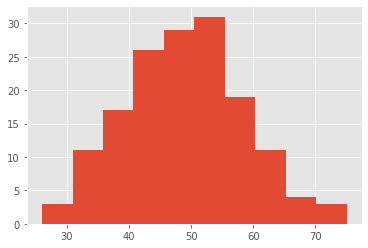

In [199]:
#2) Histogram based on the length of words
df["subject"].str.len().hist()

<AxesSubplot: >

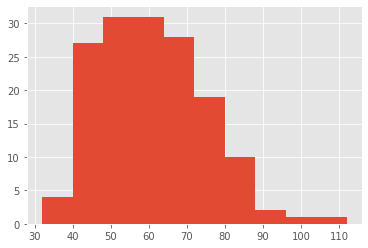

In [200]:
#3) Plot the number of words per body
df["body"].str.split().map(lambda x:len(x)).hist()

<AxesSubplot: >

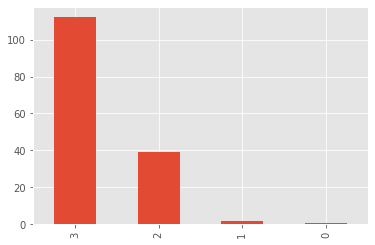

In [201]:
# Show the label counts for opened and not opened 
plt.style.use("ggplot")
fig, ax = plt.subplots()
df['opened'].value_counts().plot(ax=ax, kind='bar')

## Transform the data 

In [202]:
# Build the word_to_idx
subject_words = ' '.join([i for i in df['subject']]).split() 
body_words = ' '.join([i for i in df['body']]).split() 
total_words = subject_words+body_words
print("The total number of words are :",len(total_words))

The total number of words are : 10432


In [203]:
corpus = list(set(total_words))
word_to_idx["unknown"]=0
idx_to_word[0]="unkwown"

for idx, word in enumerate(corpus):
    word_to_idx[word]=idx
    idx_to_word[idx]=word
    
word_to_idx["unknown"] = len(word_to_idx)
idx_to_word[len(word_to_idx)] = "unknown"

In [205]:
# Use subject and Body as Input

new_subject, new_body, target = [], [], []
max_length = 75

for index, row in df.iterrows():
    row_input = [word_to_idx[word] for word in row["subject"].split()] + [word_to_idx[word] for word in row["body"].split()]
    if len(row_input)>max_length:
        new_subject.append(row_input[:max_length])
    else:
        new_subject.append(row_input+[0]*(max_length-len(row_input)))
    target.append(row["opened"])

In [206]:
print(new_subject[:5])

[[758, 790, 250, 203, 599, 959, 396, 316, 521, 767, 345, 845, 70, 581, 790, 250, 293, 436, 599, 797, 217, 1081, 250, 396, 538, 790, 5, 1009, 371, 10, 585, 361, 888, 70, 674, 1120, 771, 375, 1038, 203, 624, 112, 166, 26, 978, 790, 888, 70, 298, 95, 475, 220, 767, 551, 791, 299, 780, 598, 790, 345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [888, 1132, 790, 877, 957, 1122, 599, 911, 625, 521, 767, 345, 1043, 308, 11, 1108, 775, 72, 1043, 208, 797, 134, 109, 749, 800, 592, 576, 10, 184, 599, 790, 46, 903, 1089, 797, 250, 396, 1009, 1063, 790, 888, 1073, 189, 1084, 937, 1009, 339, 790, 250, 767, 309, 1009, 890, 892, 26, 371, 380, 877, 1034, 963, 219, 346, 334, 895, 299, 780, 588, 341, 70, 439, 60, 790, 345, 0, 0], [628, 250, 888, 1073, 910, 220, 767, 391, 417, 37, 521, 767, 345, 890, 147, 463, 653, 1071, 375, 1043, 308, 379, 790, 5, 1132, 433, 1108, 346, 99, 1122, 797, 119, 250, 396, 1009, 714, 556, 10, 761, 361, 790, 888, 75, 864, 405, 949, 375, 326, 403, 503, 344, 890, 867, 963, 966, 

In [207]:
# Concatenate subject and body
input_data = np.array(new_subject)#.reshape(-1,1)
output_data = np.array(target)#.reshape(-1,1)

In [208]:
print(input_data.shape)
print(output_data.shape)

(154, 75)
(154,)


## Model Building

### ML Model

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=2003)

In [213]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0).fit(X_train, Y_train)

/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [214]:
y_pred = clf.predict(X_test)

In [215]:
clf.score(X_test,Y_test)

0.6170212765957447

### DL Model

## Accuracy or Prediction

In [ ]:
df.head(10)